In [1]:
import pandas as pd
import numpy as np
import pylab

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep = ", ", header=None, engine='python')
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex',
              'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

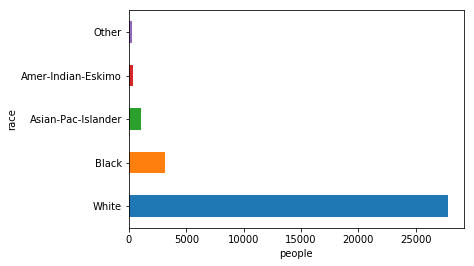

In [3]:
# Каково распределение расовой принадлежности в выборке данных?

plt.ylabel('race')
plt.xlabel('people')

df['race'].value_counts().plot(kind='barh');

In [4]:
# Каков средний возраст в выборке данных?

int(df['age'].mean())

38

In [5]:
# Сколько в выборке людей, которые никогда не женились/не выходили замуж?

len(df[df['marital-status'] == "Never-married"])

10683

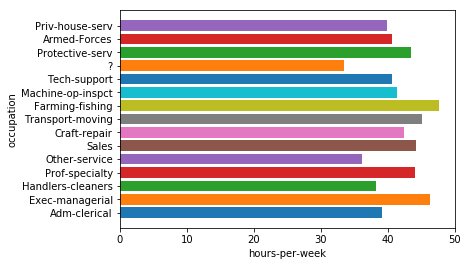

In [6]:
# Как зависит среднее количество часов работы у мужчин в зависимости от области работы (occupation)? Покажите график.

plt.ylabel('occupation')
plt.xlabel('hours-per-week')

for i in pd.unique(df['occupation'].values.ravel()):
    dataset = df[(df['occupation'] == i) & (df['sex'] == "Male")] 
    x = dataset['hours-per-week'].mean()
    plt.barh(i, x)

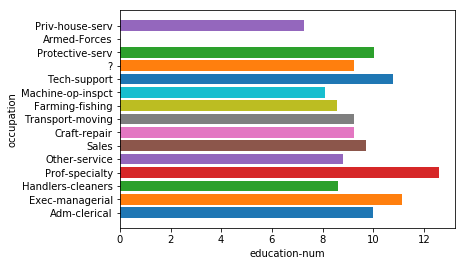

In [7]:
# Как зависит средний уровень образования у женщин от области работы?

plt.ylabel('occupation')
plt.xlabel('education-num')

for i in pd.unique(df['occupation'].values.ravel()):
    dataset = df[(df['occupation'] == i) & (df['sex'] == "Female")] 
    x = dataset['education-num'].mean()
    plt.barh(i, x)

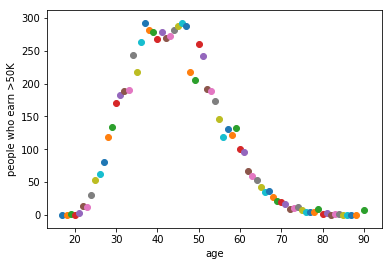

In [8]:
# Правда ли, что в среднем зарплата выше у более взрослых людей?

plt.ylabel('people who earn >50K')
plt.xlabel('age')

A = pd.unique(df[['age']].values.ravel())
A.sort()

for i in A:
    dataset = df[(df['age'] == i) & (df['income'] == ">50K")]
    x = len(dataset)
    plt.scatter(i, x)

In [9]:
# Какая страна происхождения реже всего встречается в наборе данных?
MINSTR = ''
MIN = len(df[df['native-country'] == "United-States"])

for i in pd.unique(df['native-country'].values.ravel()):
    dataset = df[df['native-country'] == i] 
    x = len(dataset)
    if(MIN > x): MINSTR = i
    #print(i, x)
    
print(MINSTR)

Holand-Netherlands


In [10]:
# В каких областях работы женщин с доходом >50K больше, чем мужчин?

for i in pd.unique(df['occupation'].values.ravel()):
    m_dataset = df[(df['occupation'] == i) & (df['income'] == ">50K") & (df['sex'] == "Male")]
    f_dataset = df[(df['occupation'] == i) & (df['income'] == ">50K") & (df['sex'] == "Female")]
    m = len(m_dataset)
    f = len(f_dataset)
    
    if(f > m): print(i)


Priv-house-serv


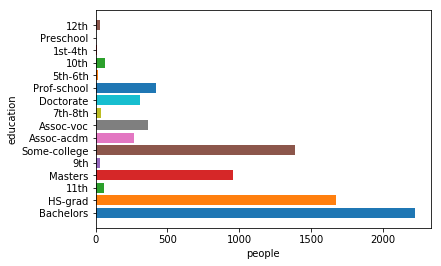

In [11]:
# Покажите на графике долю людей с доходом >50K в зависимости от образования.

plt.ylabel('education')
plt.xlabel('people')

for i in pd.unique(df['education'].values.ravel()):
    dataset = df[(df['education'] == i) & (df['income'] == ">50K")] 
    x = len(dataset)
    plt.barh(i, x)

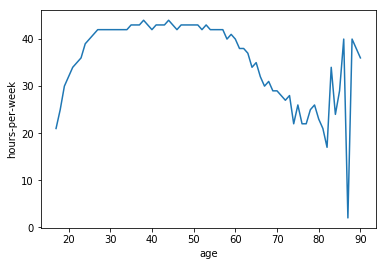

In [13]:
# Изобразите график (линию) среднего количества рабочих часов в неделю в зависимости от возраста.

plt.xlabel('age')
plt.ylabel('hours-per-week')

A = pd.unique(df[['age']].values.ravel())
A.sort()

X = []

for i in A:
    dataset = df[(df['age'] == i)]
    t = int(dataset['hours-per-week'].mean())
    X.extend([t])
    
pylab.plot(A, X)
    